<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793008/blob/main/Actividades/TecMty_Regresion_lineal_polinomial_A01793008.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad Semanal 7 - Regresiones
## Maestría en Inteligencia Artificial Aplicada
### Curso: Ciencia y analítica de datos
### Tecnológico de Monterrey
### **Nombre del estudiante:** Omar Nayib García Sabag
### **Matrícula:** A01793008

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [2]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [3]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

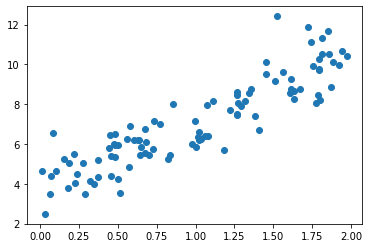

In [4]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [5]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [6]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [7]:
#X_fit[]

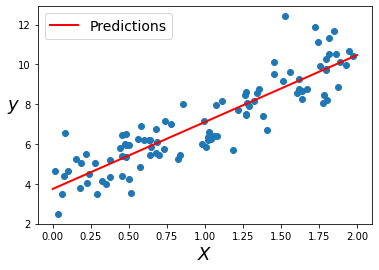

In [8]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [9]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [10]:
X_new.shape

(2, 1)

In [11]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [12]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [13]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [14]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

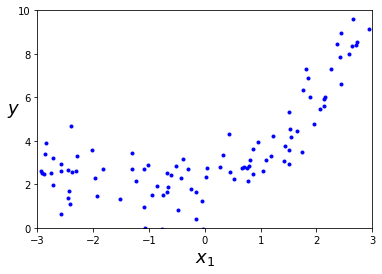

In [15]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [16]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [18]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [19]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [20]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [21]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

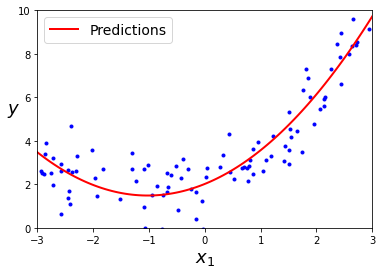

In [22]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [25]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [26]:
len(X)

1000

In [27]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

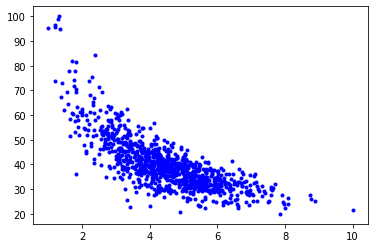

In [28]:
plt.plot(X,y,'b.')

## Lineal

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size   = 0.8, random_state = 1234, shuffle = True)

In [31]:
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_test, y_test)

LinearRegression()

In [32]:
y_pred = linear_reg.predict(X_test)

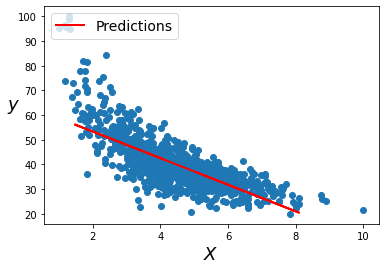

In [33]:
plt.scatter(X, y)
plt.plot(X_test, y_pred, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [34]:
linear_reg.coef_, linear_reg.intercept_

(array([-5.38145238]), 64.09678092323911)

Ecuación del modelo lineal:
> $\hat{y} = -5.38X + 64.09$

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

In [36]:
rmse_lin = mean_squared_error(y_test, y_pred, squared = False)
r2_lin = r2_score(y_test, y_pred)
mae_lin = metrics.mean_absolute_error(y_test, y_pred)

print(f"El error (rmse) de test es: {rmse_lin}")
print(f"El R2 de test es: {r2_lin}")
print(f'Error medio Absoluto (MAE): {mae_lin}')

El error (rmse) de test es: 5.9679734768237775
El R2 de test es: 0.579954747437816
Error medio Absoluto (MAE): 4.410304425957549


## Polinomial

In [37]:
from sklearn.preprocessing import PolynomialFeatures 

In [38]:
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X_train)

In [39]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y_train)
lin_reg.coef_, lin_reg.intercept_

(array([-17.1413409 ,   1.19820742]), 90.58786991113632)

Ecuación del Modelo Cuadrático:
> $\hat{y} = -17.14X + 1.19X^2 + 90.58$

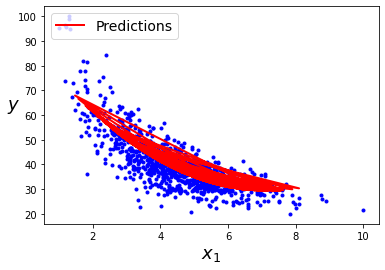

In [40]:
X_poly_test = poly_features.fit_transform(X_test)
y_pred = lin_reg.predict(X_poly_test)
plt.plot(X, y, "b.")
plt.plot(X_test, y_pred, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)

In [41]:
rmse_pol = mean_squared_error(y_test, y_pred, squared = False)
r2_pol = r2_score(y_test, y_pred)
mae_pol = metrics.mean_absolute_error(y_test, y_pred)

print(f"El error (rmse) de test es: {rmse_pol}")
print(f"El R2 de test es: {r2_pol}")
print(f'Error medio Absoluto (MAE): {mae_pol}')

El error (rmse) de test es: 5.581104369206534
El R2 de test es: 0.6326478380796126
Error medio Absoluto (MAE): 4.066891562627315


## Ridge

In [42]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [43]:
modelo = RidgeCV(alphas = np.logspace(-20, 20, 500), 
                 fit_intercept = True, 
                 normalize = True,
                 store_cv_values = True)
modelo.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e-20, 1.20270833e-20, 1.44650734e-20, 1.73972643e-20,
       2.09238348e-20, 2.51652705e-20, 3.02664806e-20, 3.64017485e-20,
       4.37806863e-20, 5.26553963e-20, 6.33290840e-20, 7.61664172e-20,
       9.16059848e-20, 1.10175281e-19, 1.32508729e-19, 1.59369353e-19,
       1.91674849e-19, 2.30528939e-19, 2.77259076e-19, 3.33461802e-19,
       4.01057288e-19, 4.82354943e-1...
       1.43321923e+18, 1.72374471e+18, 2.07316213e+18, 2.49340937e+18,
       2.99884423e+18, 3.60673495e+18, 4.33785019e+18, 5.21716858e+18,
       6.27473213e+18, 7.54667263e+18, 9.07644607e+18, 1.09163173e+19,
       1.31291459e+19, 1.57905331e+19, 1.89914058e+19, 2.28411221e+19,
       2.74712079e+19, 3.30398507e+19, 3.97373038e+19, 4.77923865e+19,
       5.74803016e+19, 6.91320378e+19, 8.31456781e+19, 1.00000000e+20]),
        normalize=True, store_cv_values=True)

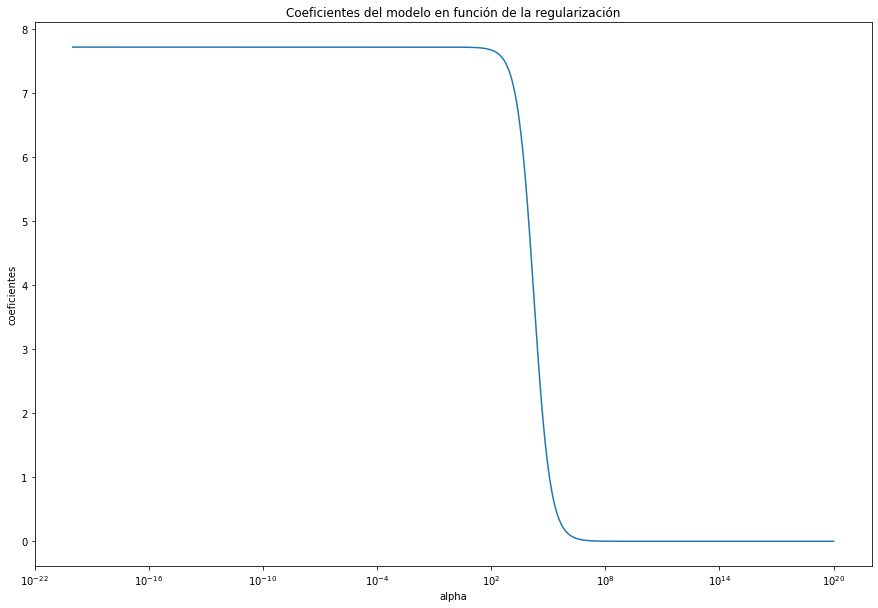

In [44]:
alphas = modelo.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Ridge(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_)

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');
plt.axis('tight')
plt.show()

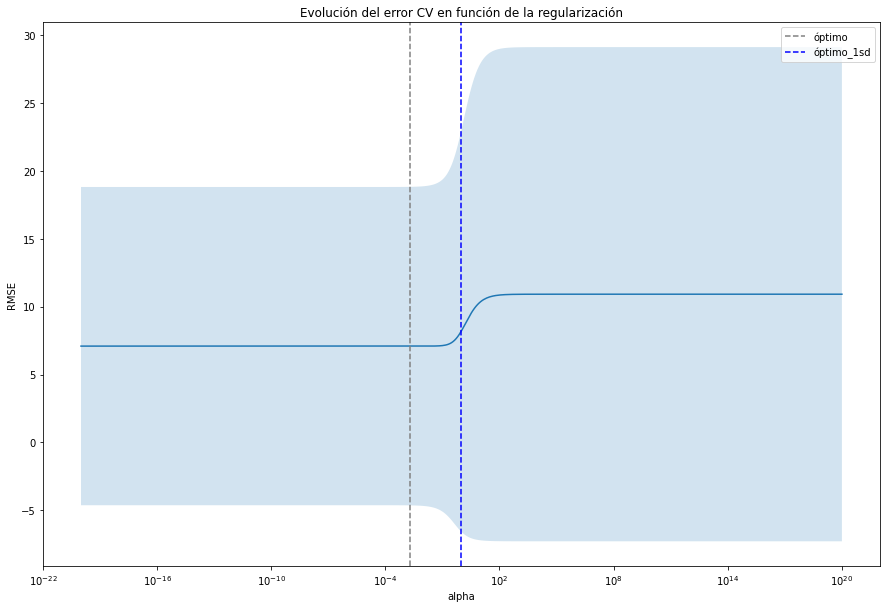

In [45]:
mse_cv = modelo.cv_values_.reshape((-1, 500)).mean(axis=0)
mse_sd = modelo.cv_values_.reshape((-1, 500)).std(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas[rmse_cv == min_rsme_1sd]


# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(modelo.alphas, rmse_cv)
ax.fill_between(
    modelo.alphas,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd.any(),
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)
ax.set_xscale('log')
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

In [46]:
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")

Mejor valor de alpha encontrado: 0.0020636177678638565


In [47]:
y_pred = modelo.predict(X_test)
y_pred = y_pred.flatten()
y_pred[:10]

array([36.27878832, 18.89235114, 48.42147438, 34.16678282, 41.44118481,
       42.79033327, 36.18150992, 39.17363988, 37.39716875, 50.57474229])

In [48]:
modelo.coef_, modelo.intercept_

(array([-6.17391974]), 67.66857806035881)

Ecuación del Modelo Cuadrático:
> $\hat{y} = -6.17X + 67.66$

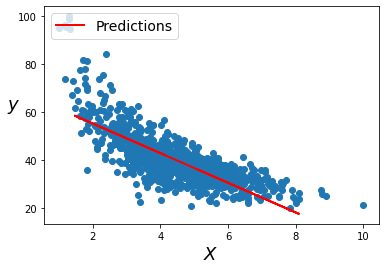

In [49]:
plt.scatter(X, y)
plt.plot(X_test, y_pred, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [50]:
rmse_ridge = mean_squared_error(y_test, y_pred, squared = False)
r2_ridge = r2_score(y_test, y_pred)
mae_ridge = metrics.mean_absolute_error(y_test, y_pred)

print(f"El error (rmse) de test es: {rmse_ridge}")
print(f"El R2 de test es: {r2_ridge}")
print(f'Error medio Absoluto (MAE): {mae_ridge}')

El error (rmse) de test es: 6.056658768766451
El R2 de test es: 0.5673780760089375
Error medio Absoluto (MAE): 4.520911055081208


## Lasso

In [51]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [52]:
modelo = LassoCV(alphas = np.logspace(-5, 5, 500), normalize = True, cv = 10)
modelo.fit(X = X_train, y = y_train)

LassoCV(alphas=array([1.00000000e-05, 1.04722519e-05, 1.09668060e-05, 1.14847155e-05,
       1.20270833e-05, 1.25950646e-05, 1.31898690e-05, 1.38127630e-05,
       1.44650734e-05, 1.51481892e-05, 1.58635653e-05, 1.66127252e-05,
       1.73972643e-05, 1.82188534e-05, 1.90792422e-05, 1.99802631e-05,
       2.09238348e-05, 2.19119669e-05, 2.29467637e-05, 2.40304289e-05,
       2.51652705e-05, 2.63537052e-0...
       3.46001639e+04, 3.62341632e+04, 3.79453285e+04, 3.97373038e+04,
       4.16139055e+04, 4.35791301e+04, 4.56371628e+04, 4.77923865e+04,
       5.00493910e+04, 5.24129830e+04, 5.48881961e+04, 5.74803016e+04,
       6.01948197e+04, 6.30375315e+04, 6.60144909e+04, 6.91320378e+04,
       7.23968114e+04, 7.58157646e+04, 7.93961785e+04, 8.31456781e+04,
       8.70722485e+04, 9.11842520e+04, 9.54904456e+04, 1.00000000e+05]),
        cv=10, normalize=True)

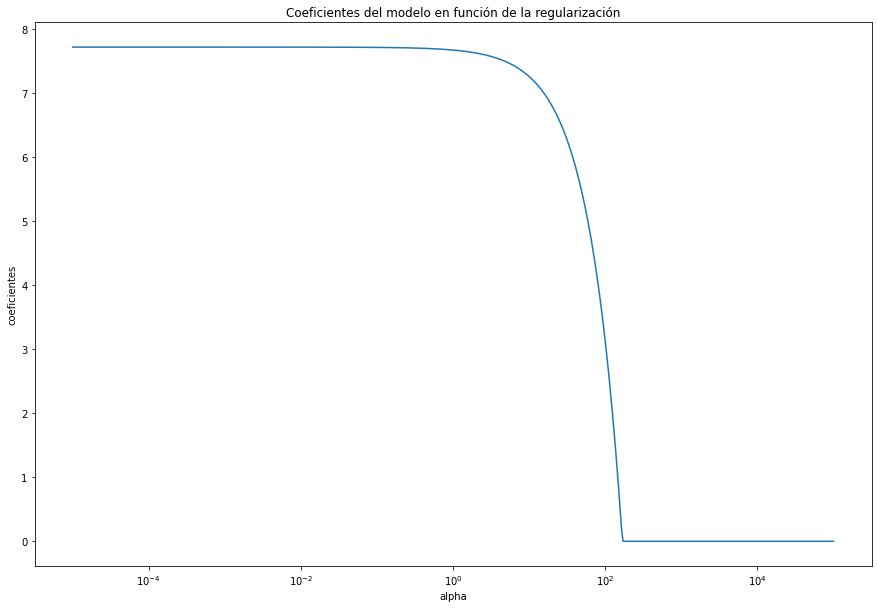

In [53]:
alphas = modelo.alphas_
coefs = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');

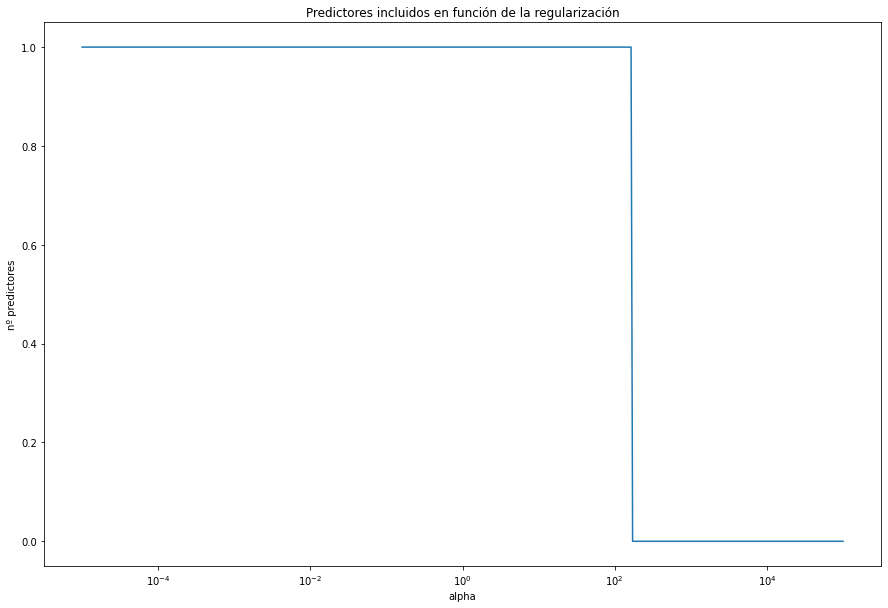

In [54]:
# Número de predictores incluidos (coeficiente !=0) en función de alpha
alphas = modelo.alphas_
n_predictores = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(X_train, y_train)
    coef_no_cero = np.sum(modelo_temp.coef_.flatten() != 0)
    n_predictores.append(coef_no_cero)

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(alphas, n_predictores)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('nº predictores')
ax.set_title('Predictores incluidos en función de la regularización');

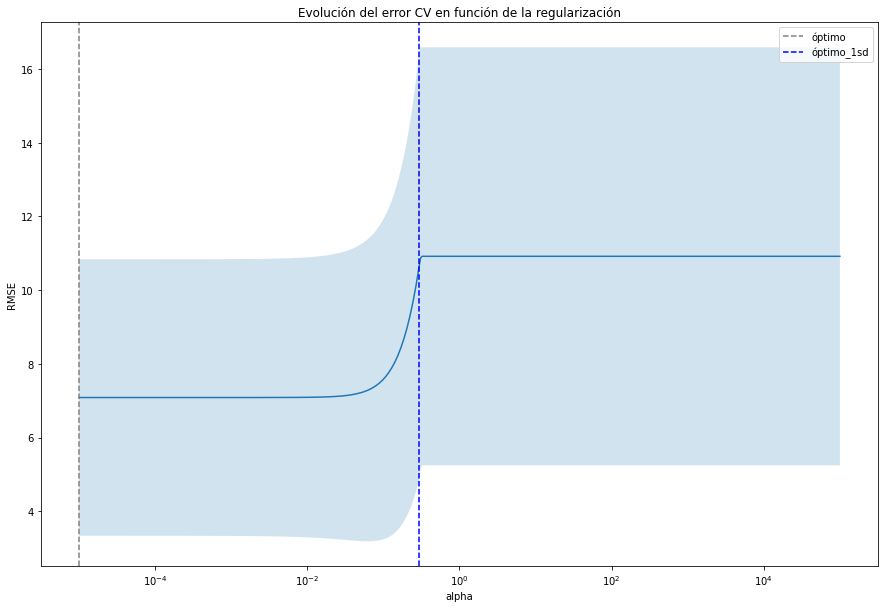

In [55]:
mse_cv = modelo.mse_path_.mean(axis=1)
mse_sd = modelo.mse_path_.std(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas_[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas_[rmse_cv == min_rsme_1sd]

# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(modelo.alphas_, rmse_cv)
ax.fill_between(
    modelo.alphas_,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)

ax.set_xscale('log')
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

In [56]:
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")

Mejor valor de alpha encontrado: 1e-05


In [57]:
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas_[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas_[rmse_cv == min_rsme_1sd]

print(f"Mejor valor de alpha encontrado + 1 desviación estándar: {optimo_1sd}")

Mejor valor de alpha encontrado + 1 desviación estándar: [0.29440005]


In [58]:
modelo = Lasso(alpha=optimo_1sd, normalize=True)
modelo.fit(X_train, y_train)

Lasso(alpha=array([0.29440005]), normalize=True)

In [59]:
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()
predicciones[:10]

array([40.09840311, 40.09840311, 40.09840311, 40.09840311, 40.09840311,
       40.09840311, 40.09840311, 40.09840311, 40.09840311, 40.09840311])

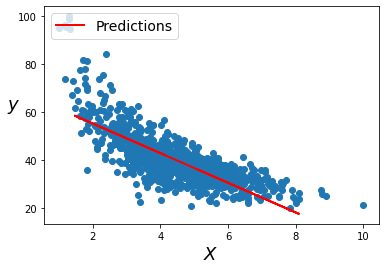

In [60]:
plt.scatter(X, y)
plt.plot(X_test, y_pred, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [61]:
rmse_lasso = mean_squared_error(y_test, y_pred, squared = False)
r2_lasso = r2_score(y_test, y_pred)
mae_lasso = metrics.mean_absolute_error(y_test, y_pred)

print(f"El error (rmse) de test es: {rmse_lasso}")
print(f"El R2 de test es: {r2_lasso}")
print(f'Error medio Absoluto (MAE): {mae_lasso}')

El error (rmse) de test es: 6.056658768766451
El R2 de test es: 0.5673780760089375
Error medio Absoluto (MAE): 4.520911055081208


## Comparación

### RMSE

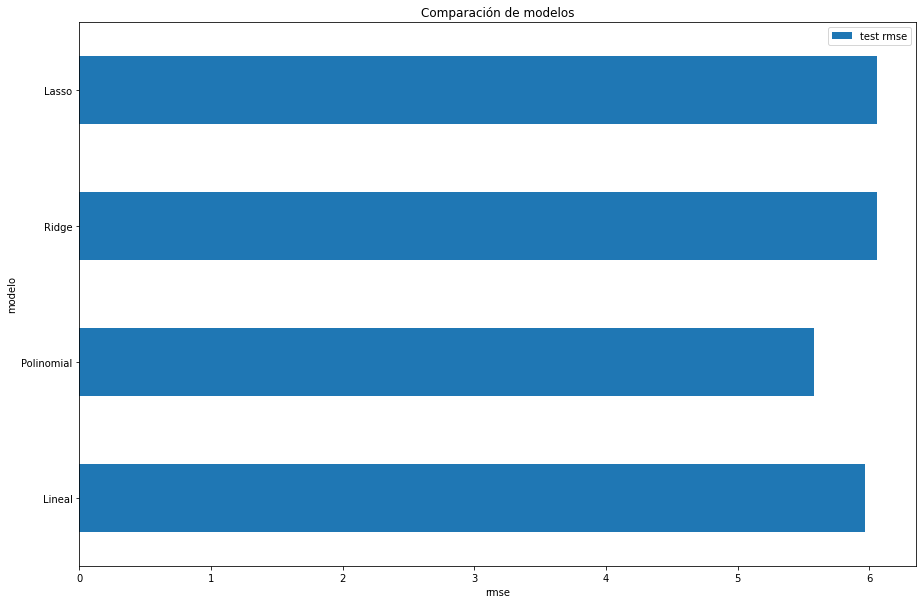

In [62]:
df_comparacion = pd.DataFrame({
                    'modelo': ['Lineal', 'Polinomial', 'Ridge', 'Lasso'],
                    'test rmse': [rmse_lin, rmse_pol, rmse_ridge, rmse_lasso]
                 })

fig, ax = plt.subplots(figsize=(15, 10))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

### R2

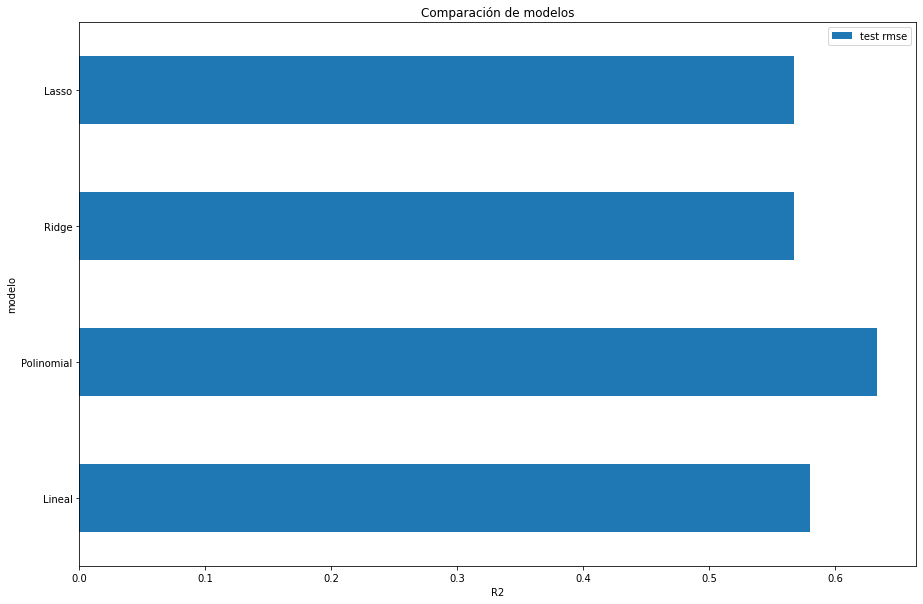

In [63]:
df_comparacion = pd.DataFrame({
                    'modelo': ['Lineal', 'Polinomial', 'Ridge', 'Lasso'],
                    'test rmse': [r2_lin, r2_pol, r2_ridge, r2_lasso]
                 })

fig, ax = plt.subplots(figsize=(15, 10))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('R2')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

### MAE

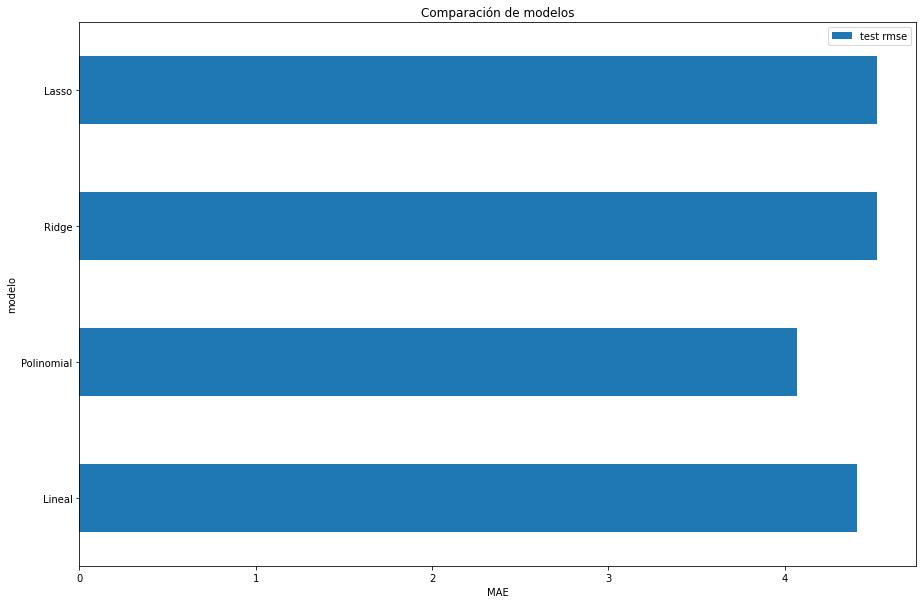

In [64]:
df_comparacion = pd.DataFrame({
                    'modelo': ['Lineal', 'Polinomial', 'Ridge', 'Lasso'],
                    'test rmse': [mae_lin, mae_pol, mae_ridge, mae_lasso]
                 })

fig, ax = plt.subplots(figsize=(15, 10))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('MAE')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

## Conclusiones

Para el ejercicio dividimos nuestros datos en 80% entrenamiento y 20% evaluación.

Podemos observar desde la gráfica de la distribución de los datos que el comportamiento iba a ser como de una parábola en vez de una recta.
Esto queda demostrado al hacer la comparación de los modelos Lineal, Polinomial, Ridge y Lasso ya que el mejor se agusta a los datos es un modelo polinomial de grado 2, ya que al comparar las métricas de RMSE, R2 y MAE es el que mejor resultados obtuvo.

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [65]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1433,9471200370,20150330T000000,2537000.0,4,3.00,3710,20000,2.0,0,2,...,10,2760,950,1936,0,98105,47.6696,-122.261,3970,20000
9807,7732501000,20140617T000000,854000.0,4,2.75,3150,38865,1.0,0,0,...,10,2480,670,1986,0,98052,47.7302,-122.106,3150,35880
10090,2621420060,20140728T000000,275000.0,4,2.50,2060,5742,2.0,0,0,...,7,2060,0,1999,0,98030,47.3612,-122.185,1610,7298
9575,405100165,20141119T000000,460000.0,2,1.50,1820,7800,1.0,0,0,...,7,1240,580,1956,0,98133,47.7513,-122.357,1400,7800
12160,2547200160,20150212T000000,601500.0,3,1.75,1460,10128,1.0,0,0,...,8,1460,0,1968,2000,98033,47.6709,-122.167,2240,10154
20147,7548301041,20140623T000000,345000.0,3,1.50,1420,1192,2.0,0,0,...,8,1140,280,2008,0,98144,47.5881,-122.304,1340,1213
5018,8021700715,20140514T000000,702500.0,3,1.50,2360,6750,2.0,0,0,...,7,1930,430,1926,0,98103,47.6923,-122.332,1320,4500
14579,871001484,20150115T000000,719000.0,3,1.75,1800,5816,1.0,0,0,...,7,900,900,1947,0,98199,47.6529,-122.407,1650,5816
12723,2988800065,20141202T000000,281000.0,2,1.00,1280,12500,1.0,0,0,...,7,1060,220,1951,0,98178,47.4833,-122.237,1460,17771
5592,2726049071,20141211T000000,510000.0,2,1.00,820,4206,1.0,0,0,...,5,820,0,1949,0,98125,47.7076,-122.284,1810,7200


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [67]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [68]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


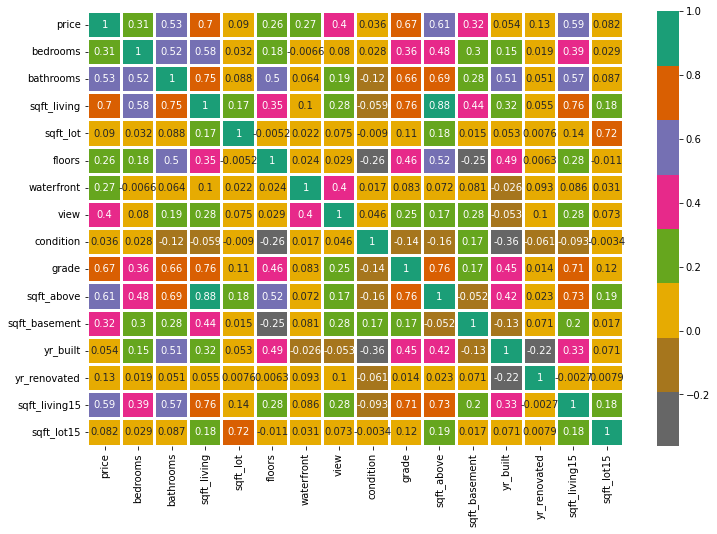

In [69]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [70]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size   = 0.8, random_state = 1234, shuffle = True)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 17290
Tamaño de X_train: (17290, 15)
**************************************************
Mumero total de registros en el test dataset: 4323
Tamaño del X_test: (4323, 15)


## Multiple Lineal

In [72]:
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_test, y_test)

LinearRegression()

In [73]:
y_pred = linear_reg.predict(X_test)

In [74]:
linear_reg.coef_, linear_reg.intercept_

(array([[-3.91767520e+04,  3.46700074e+04,  1.09365666e+02,
          2.32160012e-01,  2.05948232e+04,  6.96531027e+05,
          4.36022218e+04,  1.13697483e+04,  1.20088862e+05,
          4.77225879e+01,  6.16430781e+01, -3.26603117e+03,
          1.18176190e+01,  2.03351468e+01, -6.75454244e-01]]),
 array([5661843.60028206]))

In [75]:
rmse_lin = mean_squared_error(y_test, y_pred, squared = False)
r2_lin = r2_score(y_test, y_pred)
mae_lin = metrics.mean_absolute_error(y_test, y_pred)

print(f"El error (rmse) de test es: {rmse_lin}")
print(f"El R2 de test es: {r2_lin}")
print(f'Error medio Absoluto (MAE): {mae_lin}')

El error (rmse) de test es: 210804.0351655288
El R2 de test es: 0.6621079062632002
Error medio Absoluto (MAE): 136811.82686437044


## Multiple Polinomial

In [76]:
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X_train)

In [77]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y_train)
lin_reg.coef_, lin_reg.intercept_

(array([[ 1.01488927e+06, -7.21180353e+05,  3.58661217e+03,
         -3.41253188e+01, -2.08973550e+06, -3.58281267e+06,
          9.95813614e+04,  5.28462496e+05,  1.17722581e+06,
         -4.47151676e+03, -4.69789524e+03, -8.82412692e+04,
         -3.09423328e+03,  3.70624552e+03, -3.24827563e+01,
          6.49330446e+02,  4.98970232e+03, -1.56194909e+02,
          1.38410821e-01,  1.41331860e+04,  3.59084450e+04,
         -6.41205522e+03, -1.04598466e+02, -3.90705060e+03,
          1.40591963e+02,  1.27581383e+02, -5.21218649e+02,
         -1.06547880e+01,  1.65879119e+01,  1.49270066e-01,
         -4.88631944e+03,  4.59319624e+01, -3.90955612e-01,
         -2.82025301e+04,  3.34307214e+03,  1.24438826e+04,
         -4.66665185e+03,  1.45634646e+04, -5.71349386e+00,
         -2.55334489e+01,  3.37957391e+02, -1.26642944e+01,
         -1.89632192e+01,  3.59712559e-02,  1.53023086e+03,
          1.13943416e+03, -9.40627230e+00,  1.16838958e+02,
         -5.10351680e+00,  6.27353366e+0

In [78]:
rmse_pol = mean_squared_error(y_test, y_pred, squared = False)
r2_pol = r2_score(y_test, y_pred)
mae_pol = metrics.mean_absolute_error(y_test, y_pred)

print(f"El error (rmse) de test es: {rmse_pol}")
print(f"El R2 de test es: {r2_pol}")
print(f'Error medio Absoluto (MAE): {mae_pol}')

El error (rmse) de test es: 210804.0351655288
El R2 de test es: 0.6621079062632002
Error medio Absoluto (MAE): 136811.82686437044


## Multiple Ridge

In [79]:
modelo = RidgeCV(alphas = np.logspace(-20, 20, 500), 
                 fit_intercept = True, 
                 normalize = True,
                 store_cv_values = True)
modelo.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e-20, 1.20270833e-20, 1.44650734e-20, 1.73972643e-20,
       2.09238348e-20, 2.51652705e-20, 3.02664806e-20, 3.64017485e-20,
       4.37806863e-20, 5.26553963e-20, 6.33290840e-20, 7.61664172e-20,
       9.16059848e-20, 1.10175281e-19, 1.32508729e-19, 1.59369353e-19,
       1.91674849e-19, 2.30528939e-19, 2.77259076e-19, 3.33461802e-19,
       4.01057288e-19, 4.82354943e-1...
       1.43321923e+18, 1.72374471e+18, 2.07316213e+18, 2.49340937e+18,
       2.99884423e+18, 3.60673495e+18, 4.33785019e+18, 5.21716858e+18,
       6.27473213e+18, 7.54667263e+18, 9.07644607e+18, 1.09163173e+19,
       1.31291459e+19, 1.57905331e+19, 1.89914058e+19, 2.28411221e+19,
       2.74712079e+19, 3.30398507e+19, 3.97373038e+19, 4.77923865e+19,
       5.74803016e+19, 6.91320378e+19, 8.31456781e+19, 1.00000000e+20]),
        normalize=True, store_cv_values=True)

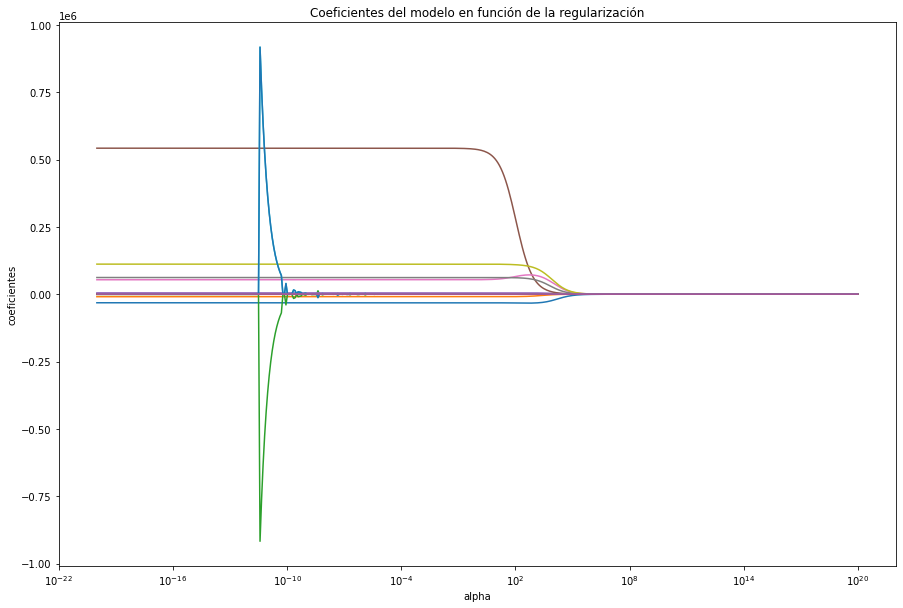

In [80]:
alphas = modelo.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Ridge(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');
plt.axis('tight')
plt.show()

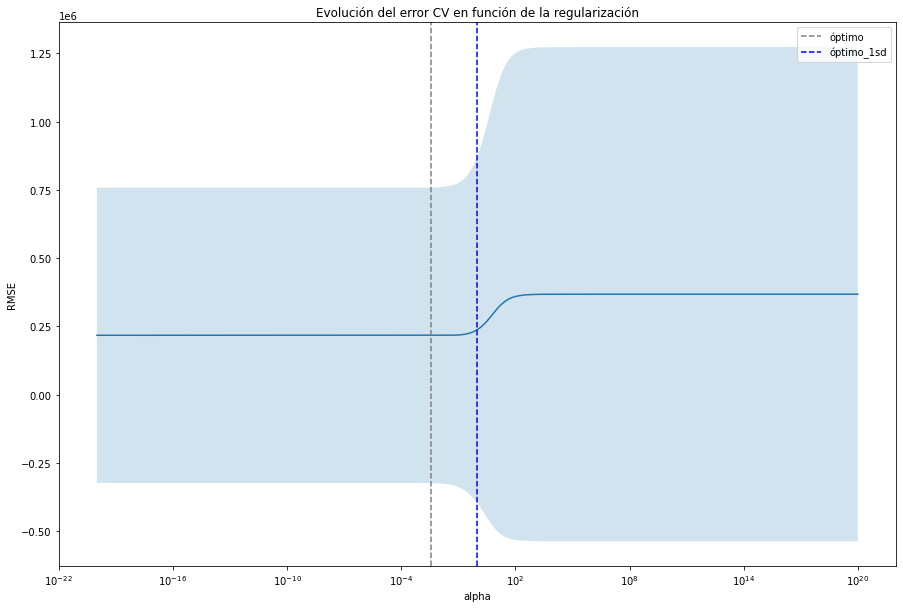

In [81]:
mse_cv = modelo.cv_values_.reshape((-1, 500)).mean(axis=0)
mse_sd = modelo.cv_values_.reshape((-1, 500)).std(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas[rmse_cv == min_rsme_1sd]


# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(modelo.alphas, rmse_cv)
ax.fill_between(
    modelo.alphas,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd.any(),
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)
ax.set_xscale('log')
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

In [82]:
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")

Mejor valor de alpha encontrado: 0.003590130377007061


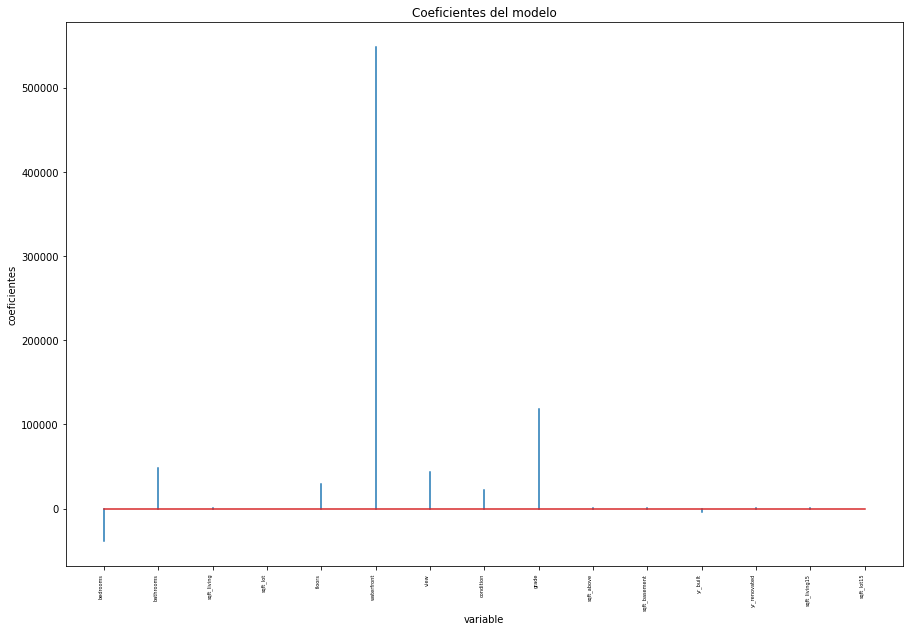

In [83]:
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(15, 10))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [84]:
y_pred = modelo.predict(X_test)
y_pred = y_pred.flatten()
y_pred[:10]

array([ 540181.84748407,  599149.90001791, 1083791.36641518,
        298194.40685522,  473351.19490065,  211389.89783323,
        639641.68683688,  565211.96959628,  559191.23910948,
        559387.4021283 ])

In [85]:
rmse_ridge = mean_squared_error(y_test, y_pred, squared = False)
r2_ridge = r2_score(y_test, y_pred)
mae_ridge = metrics.mean_absolute_error(y_test, y_pred)

print(f"El error (rmse) de test es: {rmse_ridge}")
print(f"El R2 de test es: {r2_ridge}")
print(f'Error medio Absoluto (MAE): {mae_ridge}')

El error (rmse) de test es: 211905.59555353379
El R2 de test es: 0.6585673569856612
Error medio Absoluto (MAE): 138873.25531799262


## Multiple Lasso

In [86]:
modelo = LassoCV(alphas = np.logspace(-5, 5, 500), normalize = True, cv = 10)
modelo.fit(X = X_train, y = y_train)

LassoCV(alphas=array([1.00000000e-05, 1.04722519e-05, 1.09668060e-05, 1.14847155e-05,
       1.20270833e-05, 1.25950646e-05, 1.31898690e-05, 1.38127630e-05,
       1.44650734e-05, 1.51481892e-05, 1.58635653e-05, 1.66127252e-05,
       1.73972643e-05, 1.82188534e-05, 1.90792422e-05, 1.99802631e-05,
       2.09238348e-05, 2.19119669e-05, 2.29467637e-05, 2.40304289e-05,
       2.51652705e-05, 2.63537052e-0...
       3.46001639e+04, 3.62341632e+04, 3.79453285e+04, 3.97373038e+04,
       4.16139055e+04, 4.35791301e+04, 4.56371628e+04, 4.77923865e+04,
       5.00493910e+04, 5.24129830e+04, 5.48881961e+04, 5.74803016e+04,
       6.01948197e+04, 6.30375315e+04, 6.60144909e+04, 6.91320378e+04,
       7.23968114e+04, 7.58157646e+04, 7.93961785e+04, 8.31456781e+04,
       8.70722485e+04, 9.11842520e+04, 9.54904456e+04, 1.00000000e+05]),
        cv=10, normalize=True)

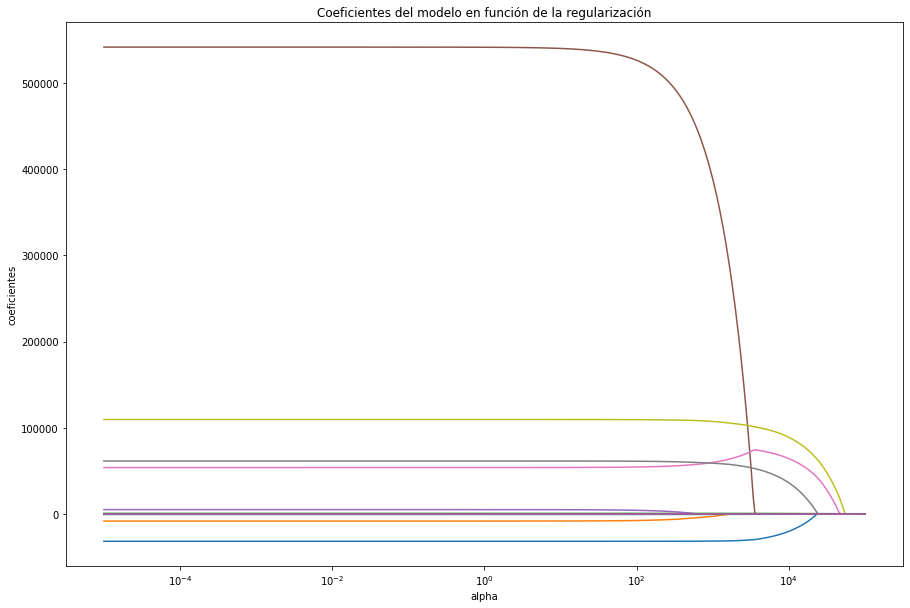

In [87]:
alphas = modelo.alphas_
coefs = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');

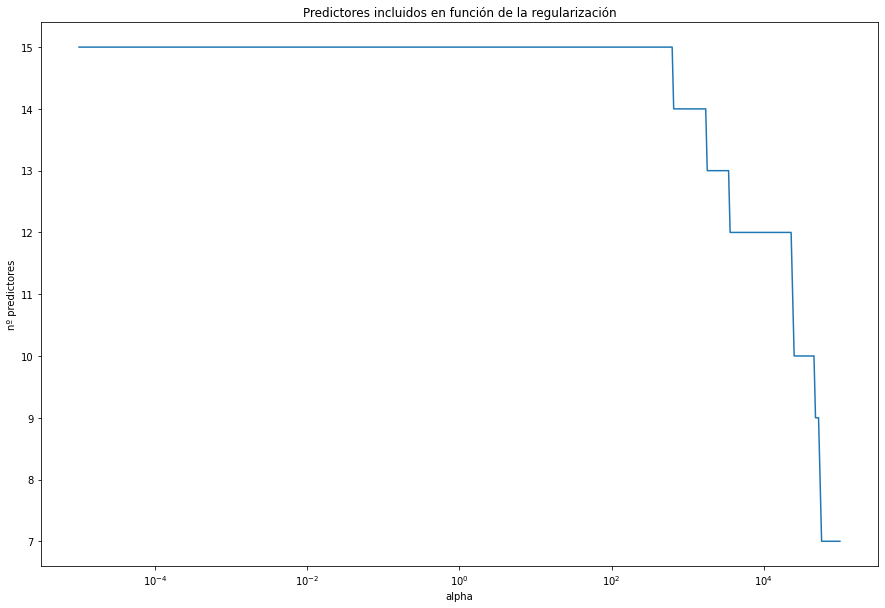

In [88]:
alphas = modelo.alphas_
n_predictores = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(X_train, y_train)
    coef_no_cero = np.sum(modelo_temp.coef_.flatten() != 0)
    n_predictores.append(coef_no_cero)

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(alphas, n_predictores)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('nº predictores')
ax.set_title('Predictores incluidos en función de la regularización');

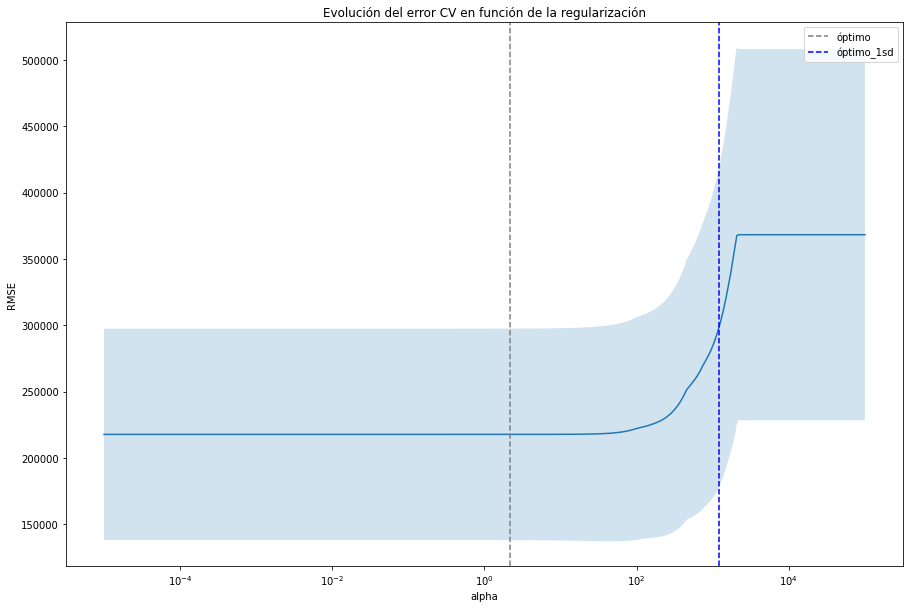

In [89]:
mse_cv = modelo.mse_path_.mean(axis=1)
mse_sd = modelo.mse_path_.std(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas_[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas_[rmse_cv == min_rsme_1sd]

# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(modelo.alphas_, rmse_cv)
ax.fill_between(
    modelo.alphas_,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)

ax.set_xscale('log')
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

In [90]:
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")

Mejor valor de alpha encontrado: 2.141220154815727


In [91]:
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas_[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas_[rmse_cv == min_rsme_1sd]

print(f"Mejor valor de alpha encontrado + 1 desviación estándar: {optimo_1sd}")

Mejor valor de alpha encontrado + 1 desviación estándar: [1191.6598431]


In [92]:
modelo = Lasso(alpha=optimo_1sd, normalize=True)
modelo.fit(X_train, y_train)

Lasso(alpha=array([1191.6598431]), normalize=True)

In [93]:
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()
predicciones[:10]

array([543399.70862747, 586098.09541111, 753419.77733874, 487922.33122648,
       543399.70862747, 407537.56153504, 562969.80256997, 624348.73357145,
       497707.37819773, 553184.75559872])

In [94]:
rmse_lasso = mean_squared_error(y_test, y_pred, squared = False)
r2_lasso = r2_score(y_test, y_pred)
mae_lasso = metrics.mean_absolute_error(y_test, y_pred)

print(f"El error (rmse) de test es: {rmse_lasso}")
print(f"El R2 de test es: {r2_lasso}")
print(f'Error medio Absoluto (MAE): {mae_lasso}')

El error (rmse) de test es: 211905.59555353379
El R2 de test es: 0.6585673569856612
Error medio Absoluto (MAE): 138873.25531799262


## Comparación

### RMSE

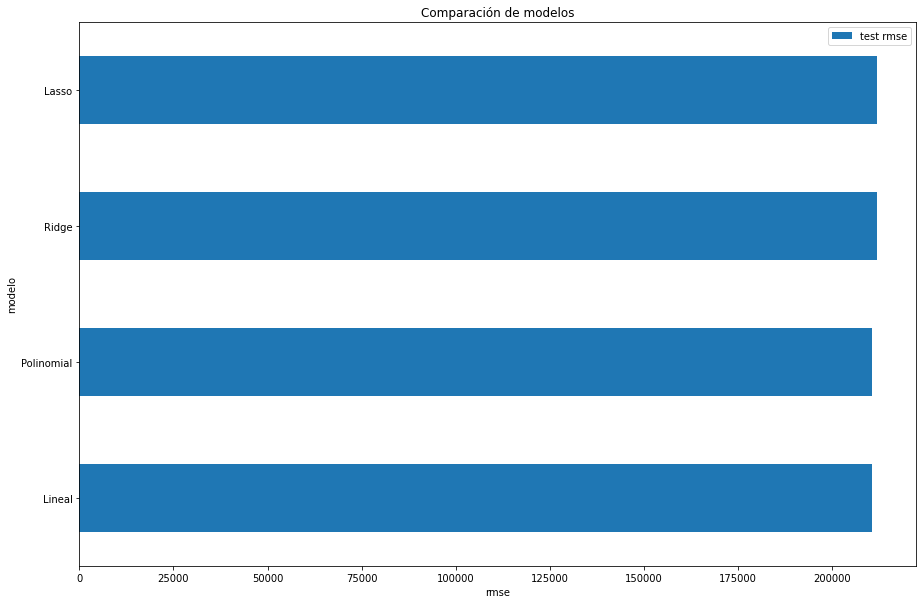

In [95]:
df_comparacion = pd.DataFrame({
                    'modelo': ['Lineal', 'Polinomial', 'Ridge', 'Lasso'],
                    'test rmse': [rmse_lin, rmse_pol, rmse_ridge, rmse_lasso]
                 })

fig, ax = plt.subplots(figsize=(15, 10))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

### R2

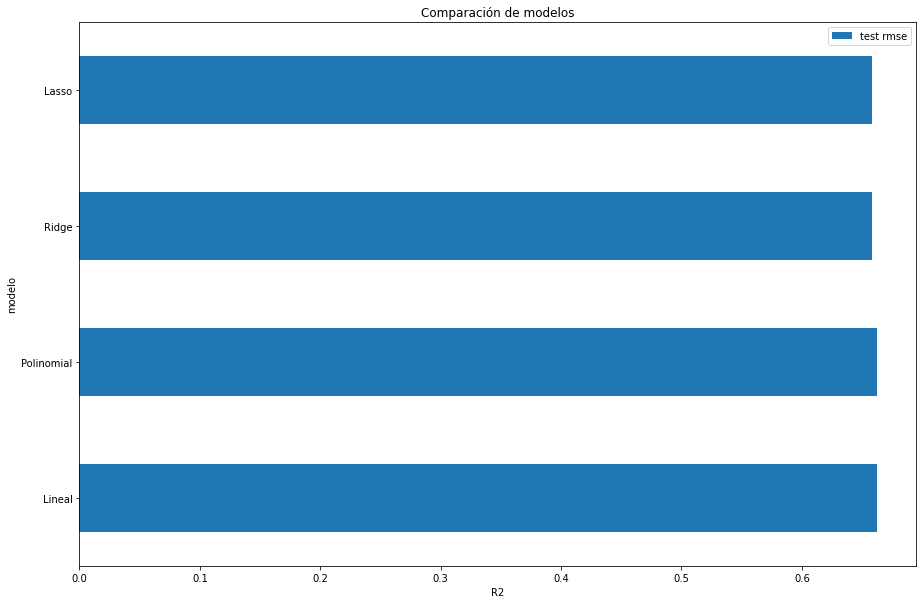

In [96]:
df_comparacion = pd.DataFrame({
                    'modelo': ['Lineal', 'Polinomial', 'Ridge', 'Lasso'],
                    'test rmse': [r2_lin, r2_pol, r2_ridge, r2_lasso]
                 })

fig, ax = plt.subplots(figsize=(15, 10))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('R2')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

### MAE

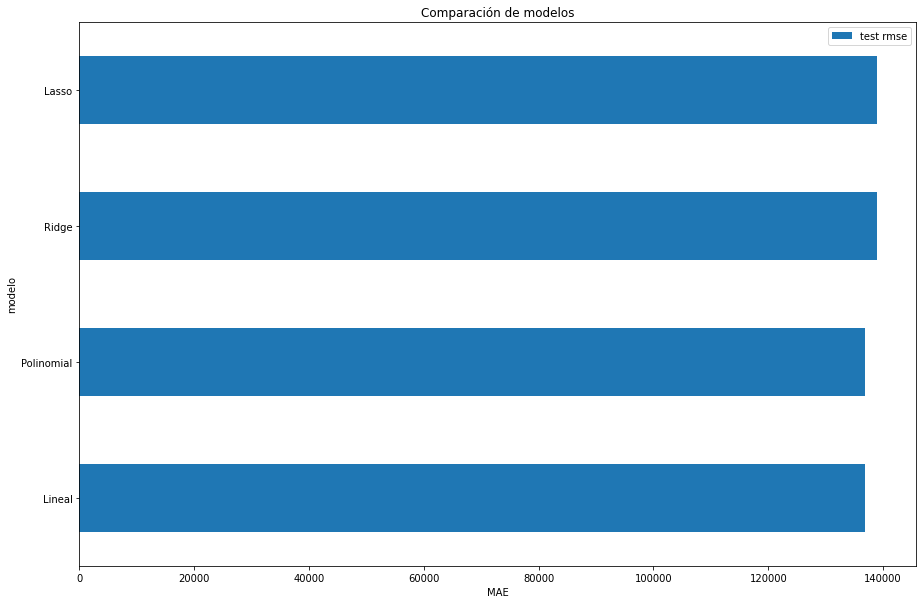

In [97]:
df_comparacion = pd.DataFrame({
                    'modelo': ['Lineal', 'Polinomial', 'Ridge', 'Lasso'],
                    'test rmse': [mae_lin, mae_pol, mae_ridge, mae_lasso]
                 })

fig, ax = plt.subplots(figsize=(15, 10))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('MAE')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

## Conclusiones

Para el ejercicio dividimos nuestros datos en 80% entrenamiento y 20% evaluación.

En este ejercicio no nos podemos ayudar de la distribución de los datos porque se trata de un caso multivariable que excede de 3 dimensiones. POr lo tanto la evaluación del mejor modelo lo basamos en sus métricas RMSE, R2 y MAE. Para este caso multivariable todos los modelos se parecen mucho en su desempeño, sin embargo el mejor modelo obtenido fue entre el Ridge, seguido del Lasso.